In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

# The chi-square distribution
A $\chi^2$ distribution with $f$ degrees of freedom is the distribution of the sum of the squares of $f$ independent standard normal variates.

Let $Z$ be normally distributed with mean 0 and variance 1. Then:

$Y = Z_1^2 + Z_2^2 + ... + Z_f^2$

$Y \sim \chi^2_f $

When $f=1$, $Y$ has the following moments about the origin:
- $E(Y) = E(Z^2) = E[(Z - \mu_Z)^2] = \sigma_Z = 1$
- $E(Y^2) = E(Z^4) = E[(Z - \mu_Z)^4] = \kappa_Z = 3$

It follows that:
- $\mu_Y = 1$
- $\sigma_Y = E(Y^2) - E^2(Y) = 3 - 1 = 2$

In general, since the $\chi^2_f$ distribution is the sum of $f$ independent random variates, then $\mu_Y = f$ and $\sigma_Y = 2f$.

An important property of this distribution is that if the sum of $K$ independent \chi^2 variates with $f_1, f_2, ..., f_k$ degrees of freedom, then their sum is a $chi^2$ random variable with $f_1 + f_2 + ..., f_k$ degrees of freedom. This follows directly from the definition of the $\chi^2$ distribution.

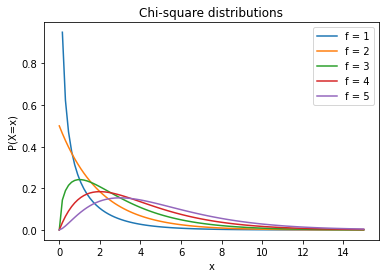

In [2]:
# x-axis
x = np.linspace(start=0, stop=15, num=100, endpoint=True)

# Chi-square distribution with multiple parameters
for ddof in range(1, 6):
    X = stats.chi2(df=ddof, loc=0, scale=1)
    plt.plot(x, X.pdf(x), label='f = ' + str(ddof))

# Styling
plt.title('Chi-square distributions')
plt.xlabel('x')
plt.ylabel('P(X=x)')
plt.legend()
plt.show()

# The *t* distribution
If $Z$ is a standard normal variate and $Y$ is a $\chi^2_f$ random variate, then $T$ follows the $t$ distribution with $f$ degrees of freedom if:

$T = \frac{Z}{\sqrt{\frac{Y}{f}}}$

## Why it matters:
In most cases, we want to find out if the effect of something is non-zero. For instance, did the effect of a Netflix advertisement campaign increase the number of viewers? In this case, we would like to disprove the hypothesis that the effect of the campaign is zero in order to avoid being fired. To do this, we take a sample of size $n$ and make inferences about $\mu$.


In repeated samples of size $n$ from a normal population with mean $\mu$ and variance $\sigma^2$ the sample mean $\bar{x}$ will be normally distributed with mean $\mu$ and variance $\frac{\sigma^2}{n}$.

Let $X$ be a standard normal variate. In statistical inference, we typically want to reject the hypothesis $H_0: \mu = \mu_0 = 0$. To test this, we calculate the statistic

$z = \frac{\bar{x} - \mu_0}{\sqrt{\frac{\sigma^2}{n}}}$

Unfortunately, the population parameter $\sigma^2$ is usually never known, so in order to test $H_0$, we must somehow get rid of $\sigma^2$ in the above statistic. We can do this by:

$
T
=
\frac
    {\frac{\bar{x} - \mu_0}{\sqrt{\frac{\sigma^2}{n}}}}
    {\sqrt{\frac{S^2}{\sigma^2}\frac{1}{n-1}}}
=
\frac
    {x - \mu_0}
    {\sqrt{\frac
        {S^2}
        {(n-1)n}
    }}
=
\frac{\bar{x} - \mu_0}{\sqrt{\frac{s^2}{n}}}
$

In the first term of the above equation the numerator is a standard normal variate ($z$) and the denominator is a chi-square random variate with $n - 1$ degrees of freedom ($\frac{S^2}{\sigma^2}$) divided by $n - 1$. By definition, $T$ follows the $t$ distribution with $n - 1$ degrees of freedom.

## What we achieved
We can now use $T$ to make inferences on the population mean, despite the fact we don't know the true value of $\sigma^2$.

Note that as $f$ increases, the $t$ distribution tends towards the standard normal curve! In other words, as we increase the number of individual observations in our sample $n$, our $T$ statistic approaches the $z$ statistic.

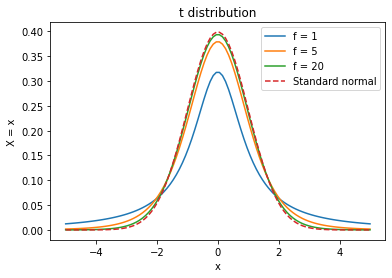

In [3]:
# x-axis
x = np.linspace(start=-5, stop=5, num=100, endpoint=True)

# t distribution with multiple degreed of freedom
for ddof in [1, 5, 20]:
    X = stats.t(df=ddof, loc=0, scale=1)
    plt.plot(x, X.pdf(x), label='f = ' + str(ddof))

# Standard normal curve 
plt.plot(x, stats.norm(loc=0, scale=1).pdf(x), label='Standard normal', ls='--')

# Styling
plt.title('t distribution')
plt.xlabel('x')
plt.ylabel('X = x')
plt.legend()
plt.show()